# 1.1

In [1]:
import math

with open('input.txt', encoding='utf8') as f:
    content = f.readlines()

num = int(content[0].split(' = ')[1])
x = [float(i) for i in content[1].split(' ')]

print(num)


12200


In [2]:
import random

random.shuffle(x)


In [3]:
class Sample(object):
    
    def __init__(self, values):
        self.values = values
    
    def mean(self):
        return st.tmean(self.values)
    
    def median(self):
        return np.median(self.values)

    def mid(self):
        return (min(self.values) + max(self.values)) / 2
    
    def mode(self):
        return st.mode(self.values)[0][0]
    
    def variance(self):
        return np.var(self.values)
    
    def std(self):
        return np.std(self.values)
    
    def moment(self, k):
        return st.moment(self.values, k)
    
    def skewness(self):
        return st.skew(self.values)
    
    def kurtosis(self):
        return st.kurtosis(self.values)
    
    def percentile(self, q):
        return np.percentile(self.values, q)
    
    def interval_mean(self, q):
        c = self.mean()
        s = self.std()
        n = len(self.values)
        delta = s / math.sqrt(n) * st.t.ppf((1+q)/2, n - 1)
        left = c - delta
        right = c + delta
        return (left, right)
    
    def interval_variance(self, q):
        s = self.std()
        n = len(self.values)
        left = (n - 1) * (s ** 2) / st.chi2.ppf((1+q)/2, n - 1)
        right = (n - 1) * (s ** 2) / st.chi2.ppf((1-q)/2, n - 1)
        return (left, right)   
        
    def __str__(self):
        return str(self.values)
    

In [4]:
samples = [Sample(x)]

samples_num = 10
for i in range(samples_num):
    start = int(i*num/10)
    end = int((i+1)*num/10)
    samples.append(Sample(x[start : end]))


# 1.2

In [5]:
num_bins = 20


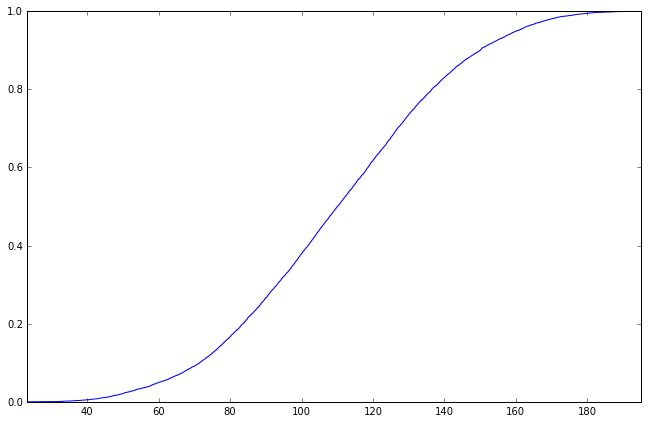

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import mlab

plt.figure(figsize=(11, 7))
plt.hist(x, num, normed=1, histtype='step', cumulative=True)
plt.xlim([min(x), max(x)-1])
plt.show()


[   10.    55.   165.   277.   390.   627.   921.  1110.  1212.  1272.
  1233.  1271.  1102.   892.   648.   454.   330.   150.    63.    18.]


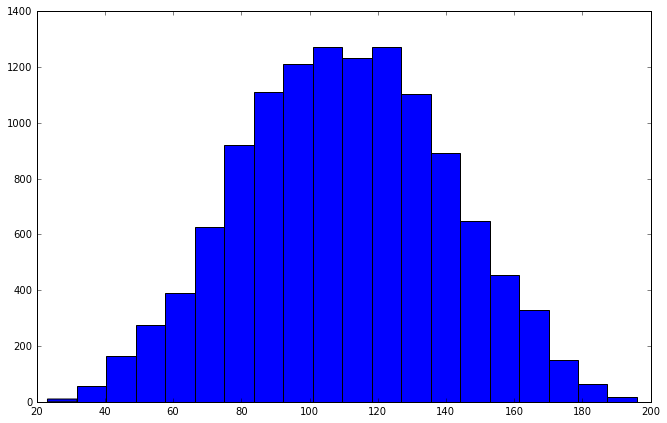

[   6.    8.   27.   19.   35.   77.   80.  106.  115.  124.  117.  110.
  117.   89.   64.   50.   44.   17.   12.    3.]


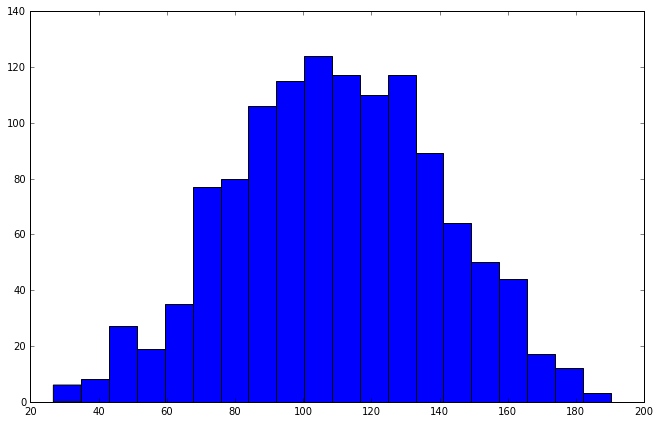

[  15.   17.   33.   40.   54.   69.  102.  100.  114.  118.  118.  122.
  101.   77.   54.   36.   26.   11.   12.    1.]


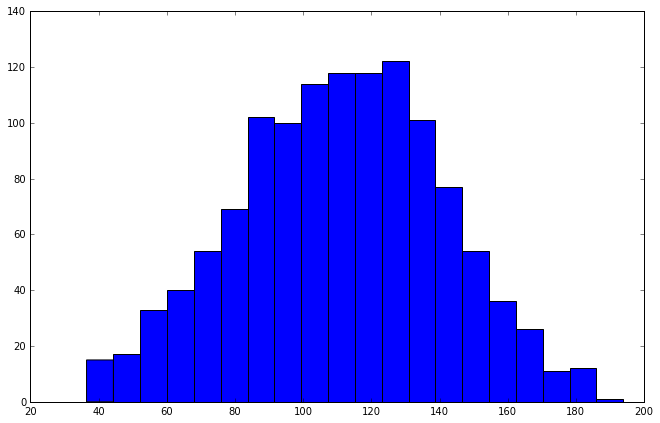

[   8.   21.   21.   42.   55.   92.   98.  114.  121.  105.  112.  103.
   93.   83.   52.   35.   30.   22.    9.    4.]


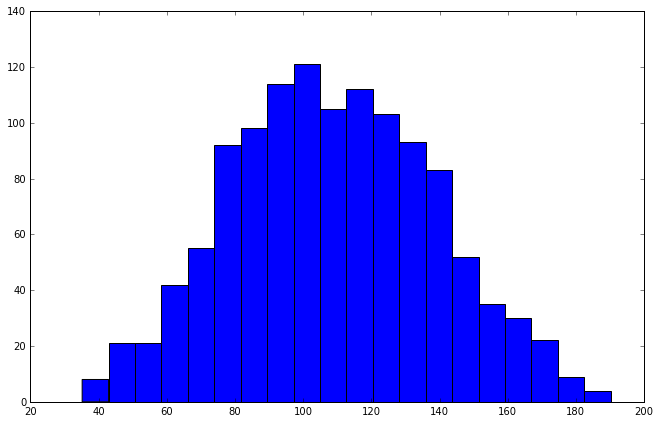

[   3.    6.   27.   23.   29.   64.   86.  104.  124.  109.  114.  121.
  106.   88.   74.   57.   37.   33.    5.   10.]


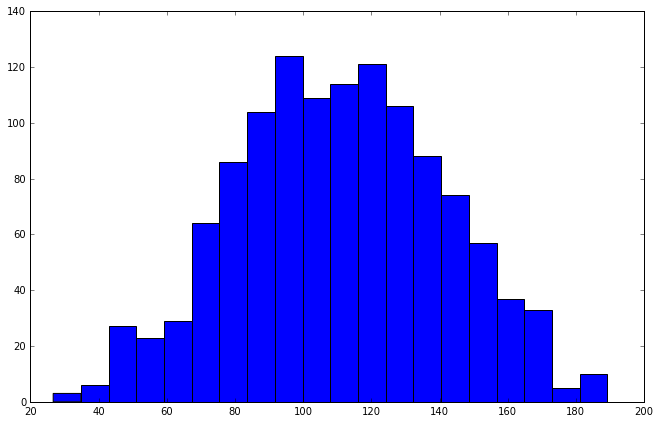

[   6.   15.   19.   35.   59.   82.   97.  115.  114.  110.  124.  117.
  113.   70.   57.   40.   26.   12.    6.    3.]


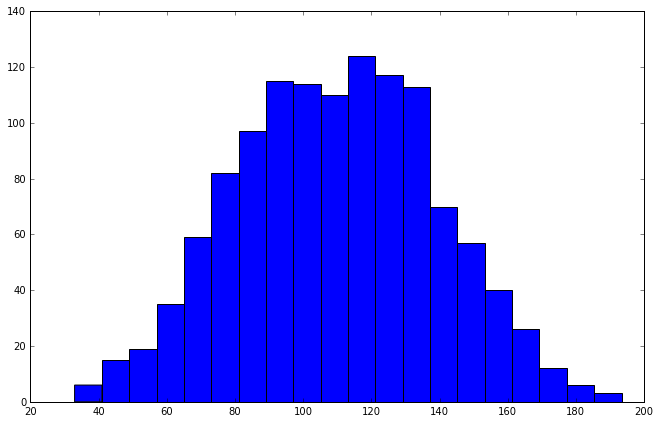

[   1.    9.   19.   33.   40.   55.  103.  116.   97.  112.   91.  112.
  106.  101.   74.   48.   41.   33.   24.    5.]


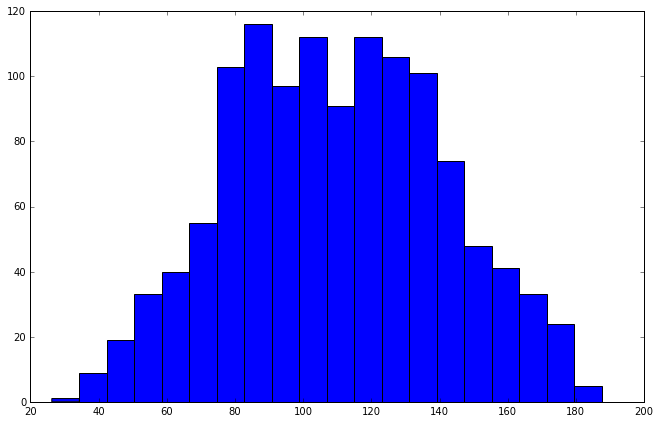

[   2.    6.   19.   26.   47.   56.   78.   96.  103.  121.  132.  119.
  123.   80.   73.   61.   37.   27.   10.    4.]


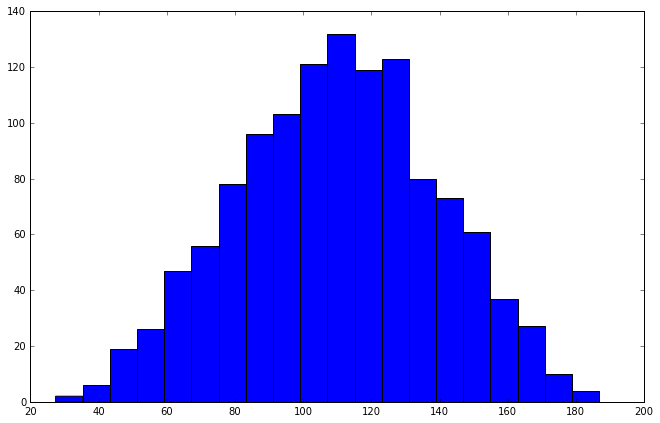

[   8.    9.   28.   37.   45.   73.   92.  105.  131.  108.  125.  120.
   97.   78.   54.   51.   32.   17.    6.    4.]


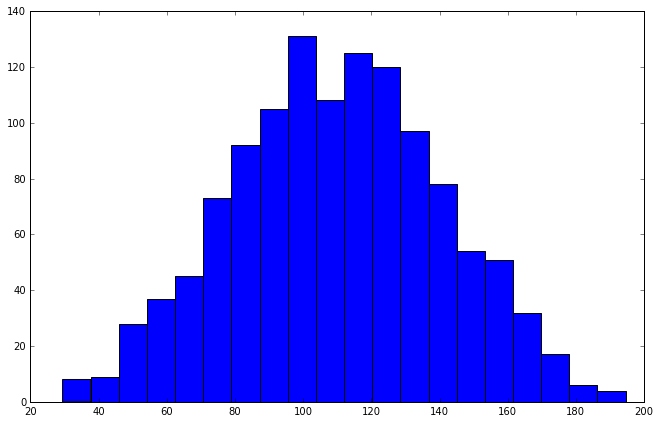

[   2.    2.   14.   15.   35.   58.   74.   89.  111.  120.  125.  117.
  112.  102.   88.   59.   47.   32.   14.    4.]


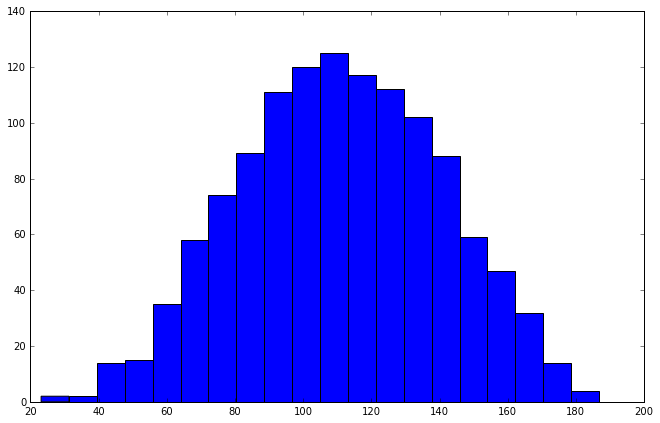

[   4.   11.   27.   25.   41.   86.   99.  121.  124.  118.  116.  120.
   89.   79.   64.   43.   34.    8.    7.    4.]


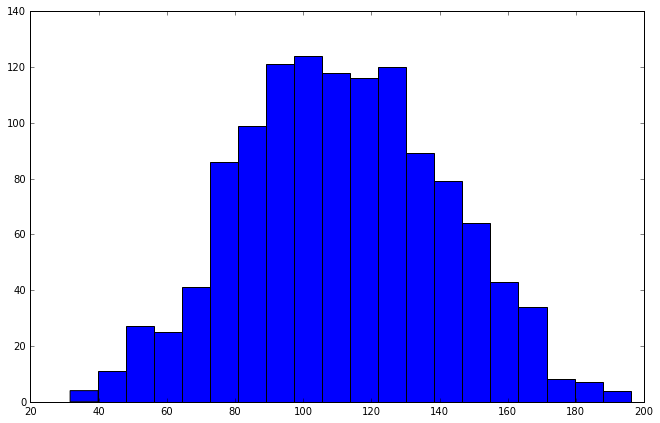

In [7]:
for s in samples:
    plt.figure(figsize=(11, 7))
    (n, bins, patches) = plt.hist(s.values, num_bins)
    print(n)
    plt.show()


# 1.3

In [8]:
import pandas as pd
import scipy.stats as st

d = {}

for i in range(len(samples)):
    s = samples[i]
    stat = {}
    stat[r'$\bar{x}$'] = s.mean()
    stat[r'$x_{med}$'] = s.median()
    stat[r'$x_{mid}$'] = s.mid()
    stat[r'$x_{mode}$'] = s.mode()
    stat[r'$s^2$'] = s.variance()
    stat[r'$s$'] = s.std()
    stat[r'$\hat{m}_3$'] = s.moment(3)
    stat[r'$\hat{m}_4$'] = s.moment(4)
    stat[r'$As$'] = s.skewness()
    stat[r'$Ex$'] = s.kurtosis()
    d[i] = pd.Series(stat)


In [9]:
keys = [r'$\bar{x}$', r'$x_{med}$', r'$x_{mid}$', r'$x_{mode}$', r'$s^2$', r'$s$',
        r'$\hat{m}_3$', r'$\hat{m}_4$', r'$As$', r'$Ex$']

df = pd.DataFrame(d, index=keys).transpose()
df

,$\bar{x}$,$x_{med}$,$x_{mid}$,$x_{mode}$,$s^2$,$s$,$\hat{m}_3$,$\hat{m}_4$,$As$,$Ex$
0,110.146511,110.0465,109.59490,101.0970,902.224343,30.037050,89.286287,2.078277e+06,0.003295,-0.446862
1,109.602450,109.4295,108.45170,114.3540,912.115391,30.201248,-805.447598,2.159455e+06,-0.029239,-0.404360
2,110.937855,111.5920,115.18225,102.0820,890.701577,29.844624,-1643.535680,2.070054e+06,-0.061827,-0.390741
3,108.756462,107.7160,112.69030,101.1380,886.609281,29.775985,2432.119396,2.014344e+06,0.092127,-0.437469
4,110.641783,110.1015,107.97205,101.4430,924.792247,30.410397,-306.992267,2.202340e+06,-0.010916,-0.424889
5,109.631075,109.8645,113.17865,101.0970,853.832391,29.220411,117.396132,1.868386e+06,0.004705,-0.437161
6,109.755926,109.2180,106.96535,92.8069,989.711784,31.459685,1757.332109,2.343050e+06,0.056440,-0.607984
7,109.882512,110.8690,107.11205,104.1610,854.716786,29.235540,-1121.919059,1.865525e+06,-0.044898,-0.446378
8,109.885541,110.2105,112.00575,99.8894,945.233541,30.744651,-185.451023,2.314485e+06,-0.006381,-0.409545
9,110.929622,110.4820,104.95890,77.6786,874.348877,29.569391,-893.931611,1.907756e+06,-0.034576,-0.504524


In [10]:
df.columns = ['x_avg', 'x_med', 'x_mid', 'x_mode', 's^2', 's', 'm_3', 'm_4', 'As', 'Ex']
df.to_csv('table.csv')

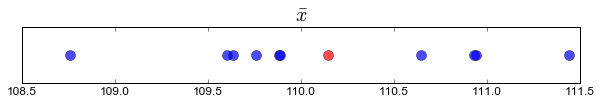

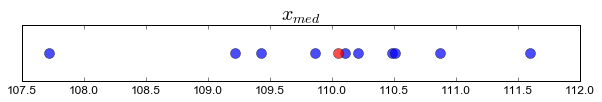

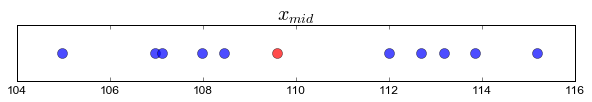

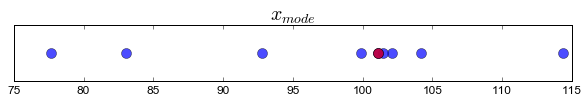

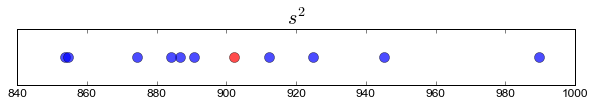

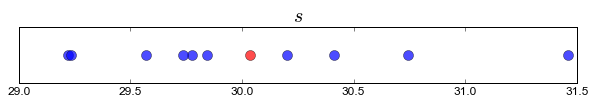

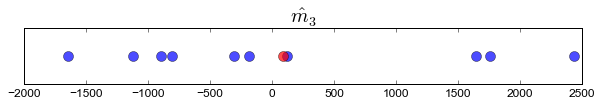

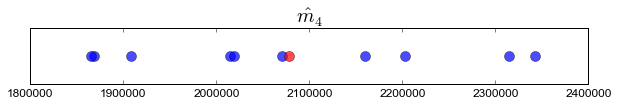

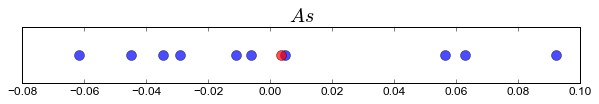

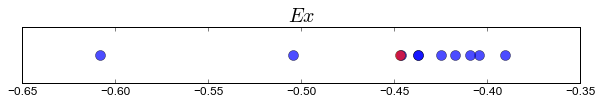

In [11]:
from matplotlib import rc

font = {'family': 'Arial', 'weight': 'normal'}
rc('font', **font)

size = len(d) - 1

for i in range(len(keys)):
    key = keys[i]
    y = np.zeros(size)
    plt.figure(figsize=(10, 1))
    plt.title(key, fontsize=20)
    plt.plot([d[i][key] for i in range(1, size + 1)], y, marker='o', linestyle='None', alpha=0.7, markersize=10)
    plt.plot(d[0][key], 0, marker='o', color='r', alpha=0.7, markersize=10)
    plt.yticks([])
    plt.xticks(fontsize=12)
    plt.show()

In [12]:
print(samples[0].percentile(2.5), end=' -- ')
print(samples[0].percentile(97.5))

51.46851 -- 167.7943


Получили границы интерквантильного промежутка:
$$J_{0.95} \approx [51, 168]$$

# 1.4

In [13]:
for sample in samples:
    print(sample.interval_mean(0.8))

(109.79798341004171, 110.49503826208947)
(108.493743710776, 110.71115612528958)
(109.84224027587842, 112.03346890444945)
(107.66336743096267, 109.84955650346356)
(109.52539867978594, 111.75816705791901)
(108.55837594010757, 110.70377405989242)
(108.60102146394981, 110.91082984752562)
(108.80925717494684, 110.95576610374168)
(108.75688614173391, 111.01419582547923)
(109.84411162594006, 112.01513230848619)
(110.35025413199678, 112.53351340898685)


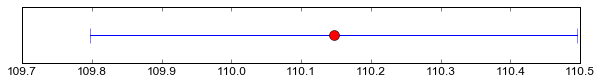

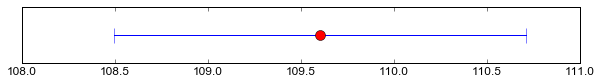

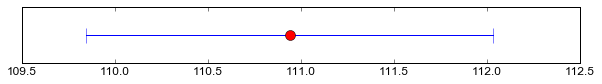

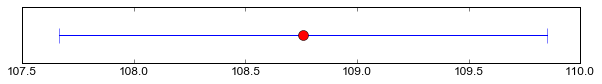

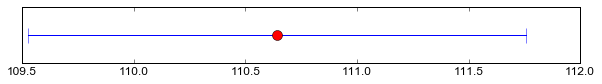

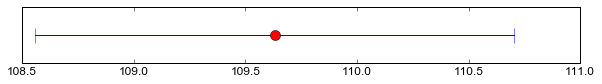

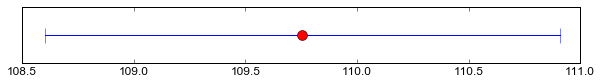

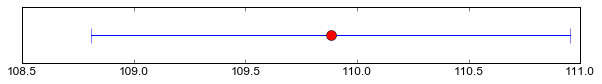

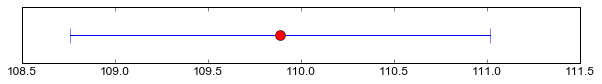

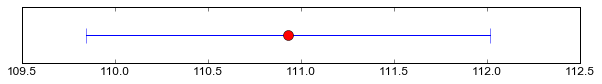

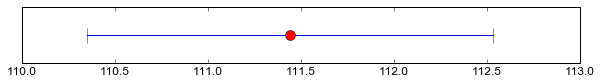

In [14]:
q = 0.8

for s in samples:
    plt.figure(figsize=(10, 1))
    x, y = list(s.interval_mean(q)), [0, 0]
    plt.plot(x, y, marker = '|', markersize=15)
    plt.plot(s.mean(), 0, color='red', marker = 'o', markersize=10)
    plt.yticks([])
    plt.xticks(fontsize=12)
    ax = plt.gca()
    ax.get_xaxis().get_major_formatter().set_useOffset(False)
    plt.show()

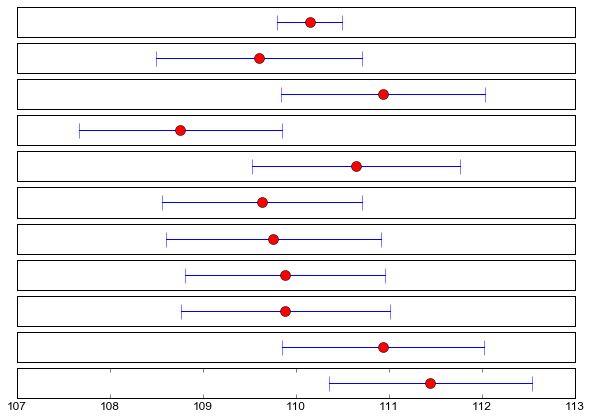

In [15]:
q = 0.8

fig = plt.figure(figsize=(10, 7))
size = len(samples)

for i in range(size):
    s = samples[i]
    if i > 0:
        ax = fig.add_subplot(size, 1, i+1, sharex = ax_prev)
    else:
        ax = fig.add_subplot(size, 1, i+1)
    x, y = list(s.interval_mean(0.8)), [0, 0]
    ax.plot(x, y, marker = '|', markersize=15)
    ax.plot(s.mean(), 0, color='red', marker = 'o', markersize=10)
    plt.yticks([])
    if (i != size - 1):
        ax.get_xaxis().set_visible(False)
    plt.xticks(fontsize=12)
    ax_prev = ax

plt.show()

In [16]:
for sample in samples:
    print(sample.interval_variance(0.8))

(887.6282171287985, 917.24305488751872)
(866.82515440924794, 961.68628951033838)
(846.47462378221815, 939.10869564527275)
(842.58552631355315, 934.79399423731309)
(878.87255317994425, 975.05209709345843)
(811.43614206631366, 900.23577265723577)
(940.56857137575798, 1043.4998278895614)
(812.27662375832051, 901.16823258375723)
(898.29885408545385, 996.60431802486755)
(830.93390104450918, 921.86727168576419)
(840.32867745385499, 932.29016679895517)


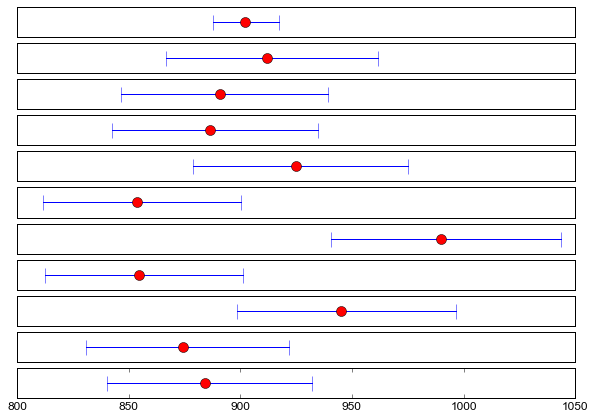

In [17]:
q = 0.8

fig = plt.figure(figsize=(10, 7))
size = len(samples)

for i in range(size):
    s = samples[i]
    if i > 0:
        ax = fig.add_subplot(size, 1, i+1, sharex = ax_prev)
    else:
        ax = fig.add_subplot(size, 1, i+1)
    x, y = list(s.interval_variance(0.8)), [0, 0]
    ax.plot(x, y, marker = '|', markersize=15)
    ax.plot(s.variance(), 0, color='red', marker = 'o', markersize=10)
    plt.yticks([])
    if (i != size - 1):
        ax.get_xaxis().set_visible(False)
    plt.xticks(fontsize=12)
    ax_prev = ax

plt.show()

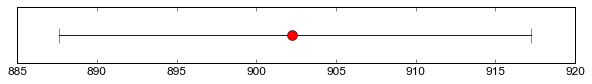

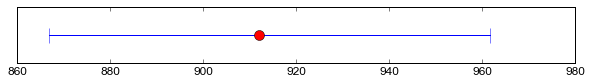

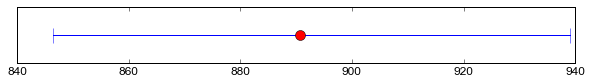

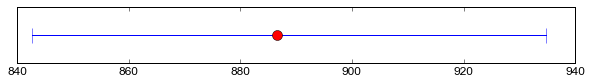

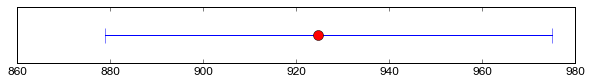

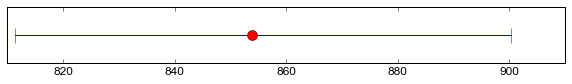

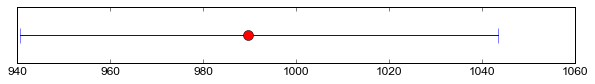

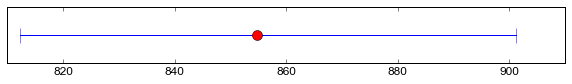

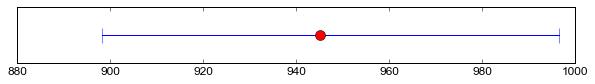

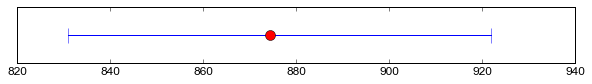

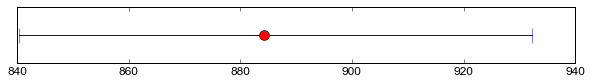

In [18]:
q = 0.8

for s in samples:
    plt.figure(figsize=(10, 1))
    x, y = list(s.interval_variance(0.8)), [0, 0]
    #plt.title('Дисперсия выборки №{i}'.format(i=i), fontsize=15)
    plt.plot(x, y, marker = '|', markersize=15)
    plt.plot(s.variance(), 0, color='red', marker = 'o', markersize=10)
    plt.yticks([])
    plt.xticks(fontsize=12)
    plt.show()